In [1]:
from matplotlib import pylab as plt
import numpy as np
%matplotlib inline
from equations_of_state import iapws97
from equations_of_state.iapws_boundaries import plot_boundaries

def plot_all_vs_t(ts):
    for i,var in enumerate(['T','p','rho','h']):
        plt.subplot(4,1,i+1)
        if i!=1:
            plt.plot(ts[:,0],ts[:,3+i])
        else:
            plt.semilogy(ts[:,0],ts[:,3+i])
        plt.ylabel(var)
    plt.tight_layout()
    plt.show()

In [2]:
import batch_test_latent_sim as bt

In [7]:
def curry_run(net,eos='water_lg',prob='Transition_L2G',ref_file=None):
    ts_l2g,ls_l2g = bt.run_one_simulation(eos,net,
                      prob,verbose=False)
    plot_all_vs_t(ts_l2g)
    plot_boundaries()
    plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')
    if not ref_file is None:
        arr = np.loadtxt(ref_file,skiprows=1,delimiter=",")
        plt.semilogy(arr[:,3]+273.15,arr[:,2],'--')
    return ts_l2g, ls_l2g

## Linear Liquid

In [4]:
ts,ls = bt.run_one_simulation('water_linear','Poly_1,1',
                      'Linear_Liquid')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_linear/Poly_1,1/final_variables
0.1 96 1.88016694434085e-07
0.2 66 1.9414629641236458e-07
0.30000000000000004 37 1.836753169540558e-07
0.4 10 1.9327292047454588e-07
0.5 0 1.9059018861191403e-07
0.6 0 1.7236404832440563e-07
0.7 0 1.5588025239594135e-07
0.7999999999999999 0 1.409751538539495e-07
0.8999999999999999 0 1.274955882601481e-07
0.9999999999999999 0 1.1530433497878902e-07
1.0999999999999999 0 1.0427994794479556e-07


In [6]:
ts,ls = bt.run_one_simulation('water_lg','Poly_rand_0.0_1,5',
                      'Linear_Liquid',verbose=False)
print(ts[-1:,:])
print(bt.Linear_Liquid.answer)

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0.0_1,5/final_variables
[[1.10000000e+00 4.27071746e-01 7.21442904e-01 2.93150071e+02
  1.00009291e+05 1.03181091e+03 7.08472599e+04]]
{'T': 293.15, 'p': 100010.0, 'rho': array(998.20549095), 'h': array(84011.82057835)}


INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0.0_1,5/final_variables
[[1.01000000e+01 4.25982696e-01 7.20172965e-01 2.93960600e+02
  1.00267746e+05 1.03115740e+03 7.54954550e+04]]
{'T': 294.15, 'p': 100000.0, 'rho': array(997.99403545), 'h': array(88196.2666457)}


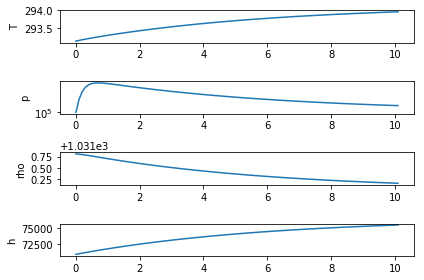

In [7]:
ts_lin_heat,ls_lin_heat = bt.run_one_simulation('water_lg',
        'Poly_rand_0.0_1,5', 'Linear_Liquid_Heat',verbose=False)
print(ts_lin_heat[-1:,:])
print(bt.Linear_Liquid_Heat.answer)
plot_all_vs_t(ts_lin_heat)

## Hot Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0_1,5/final_variables


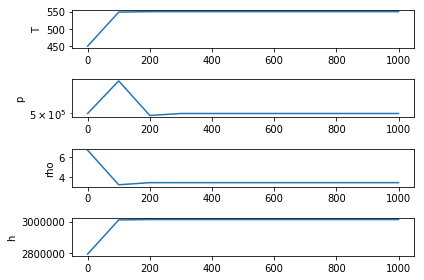

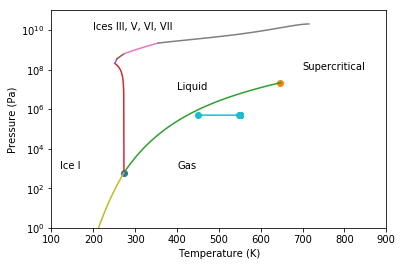

In [10]:
curry_run('Poly_pT_0_1,5',prob='Hot_Gas')

## Small Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 1.03628033e+01 2.62027117e+06]]  after  3  iterations.
10.0 23 2.0639932602950695e-08
20.0 17 3.7957647543740385e-12
30.0 18 1.7506593468983392e-12
40.0 19 1.4235297753528034e-11
50.0 21 1.50116486606359e-11
60.0 25 7.639526848376651e-11
Failed to converge at t= 70.0  |Dq| was  0.1685628703610825  after  499  iterations; quiting.


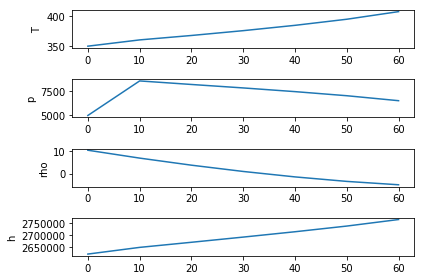

In [7]:
ts_small_gas,ls_small_gas = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas)

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Poly_2,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+03 2.22384004e+01 2.60310515e+06]]  after  3  iterations.
10.0 27 2.400029625801668e-11
20.0 9 4.92049963992799e-13
30.0 9 5.862648843165571e-12
40.0 9 2.002503551210904e-12
50.0 9 2.5236119675800184e-13
60.0 8 3.295708901389189e-09
70.0 8 4.749124070211614e-12
80.0 8 1.343419034437492e-13
90.0 7 1.356713870741946e-11
100.0 7 5.152354403850531e-13
110.0 6 1.9772275463556854e-11
120.0 6 7.342864637678688e-13
130.0 5 2.461890935070451e-11
140.0 5 1.2500625389784675e-12
150.0 4 3.8978725584137705e-11
160.0 4 4.42511401863091e-12
170.0 3 1.1948852635065408e-07
180.0 3 2.5179387771709424e-11
190.0 3 4.656747685711103e-12
200.0 3 3.8841055805064116e-13
210.0 2 2.106049837463729e-08
220.0 2 3.307923331381781e-11
230.0 2 1.5401606138480962e-11
240.0 2 7.053913907834289e-12
250.0 2 3.1862134675832785e-12
260.0 2 1.4254015763

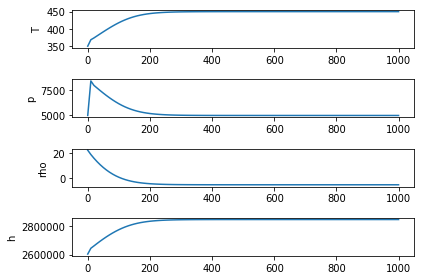

In [12]:
ts_small_gas_slgc,ls_small_gas_slgc = bt.run_one_simulation(
    'water_slgc_logp_64','Poly_2,7',
                      'Small_Gas',verbose=True)
plot_all_vs_t(ts_small_gas_slgc)

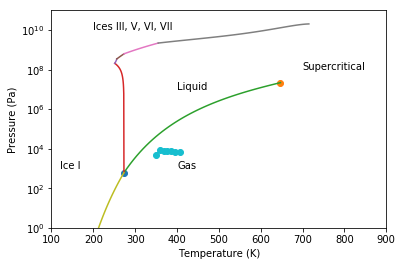

In [8]:
plot_boundaries()
plt.semilogy(ts_small_gas[:,3],ts_small_gas[:,4],'-o')

## Transition Liquid to Gas

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_1,7/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.75399728e+02 3.20459230e+05]]  after  2  iterations.


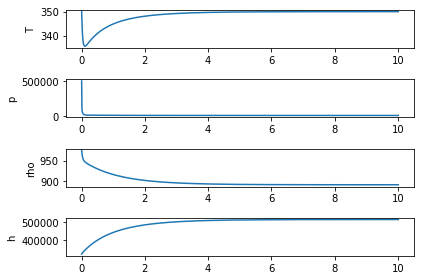

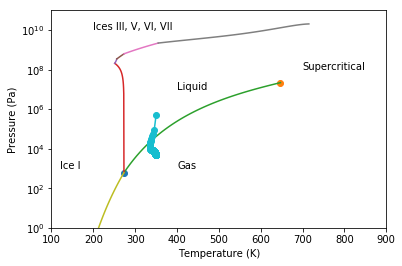

In [2]:
ts_l2g,ls_l2g = bt.run_one_simulation('water_lg','Poly_1,7',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g)
plot_boundaries()
plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_slgc_logp_64/Classifying_2,4,12,24,sigmoid/final_variables
Found point at  [[3.50000000e+02 5.00000000e+05 9.73170575e+02 3.24121968e+05]]  after  3  iterations.
Failed to converge at t= 2.949999999999981  |Dq| was  6.939751791931532  after  499  iterations; quiting.


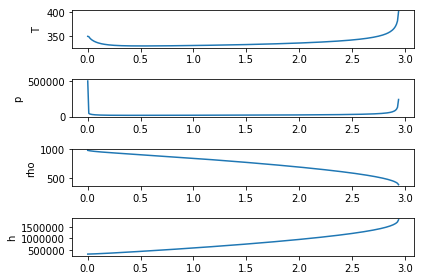

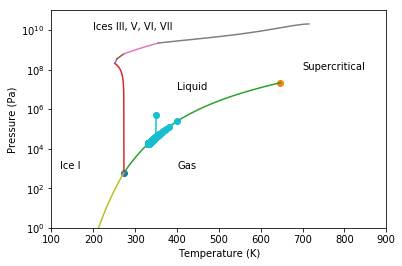

In [24]:
ts_l2g_s,ls_l2g_s = bt.run_one_simulation(
    'water_slgc_logp_64','Classifying_2,4,12,24,sigmoid',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g_s)
plot_boundaries()
plt.semilogy(ts_l2g_s[:,3],ts_l2g_s[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_pT_0_1,3,6,12,sigmoid/final_variables
Found point at  [[3.49965208e+02 5.00117957e+05 3.80920603e+08 1.58497621e+12]]  after  15  iterations, But that point was far away.
Found point at  [[3.50055540e+02 4.99892935e+05 1.31149607e+07 6.26651585e+10]]  after  20  iterations, But that point was far away.
Found point at  [[3.50177610e+02 4.99690796e+05 3.80920601e+08 1.58497620e+12]]  after  24  iterations, But that point was far away.
Failed to converge at t= 0.5200000000000002  |Dq| was  0.24785579231481408  after  499  iterations; quiting.


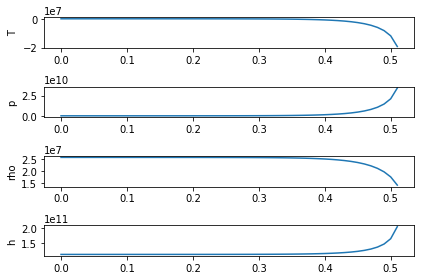

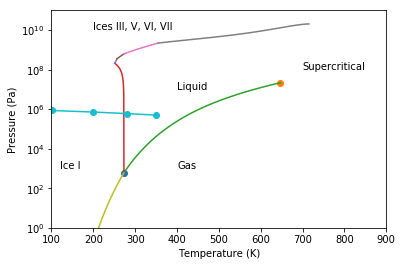

In [8]:
ts_l2g,ls_l2g = bt.run_one_simulation('water_lg','Classifying_pT_0_1,3,6,12,sigmoid',
                      'Transition_L2G',verbose=False)
plot_all_vs_t(ts_l2g)plot_boundaries()
plt.semilogy(ts_l2g[:,3],ts_l2g[:,4],'-o')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_0_1,5/final_variables
Found point at  [[3.96702668e+02 4.35132172e+05 6.65094793e+01 2.54637316e+06]]  after  99  iterations, But that point was far away.


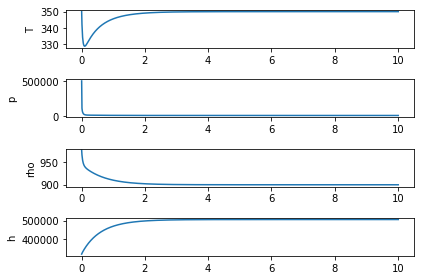

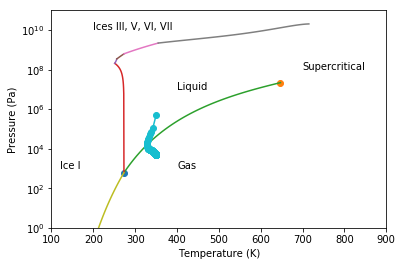

In [8]:
curry_run('Poly_pT_0_1,5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0_1,5/final_variables


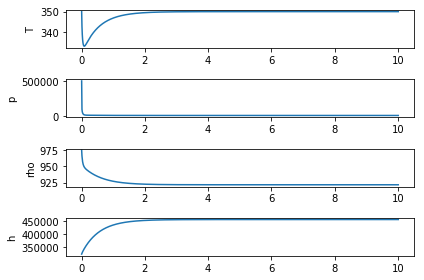

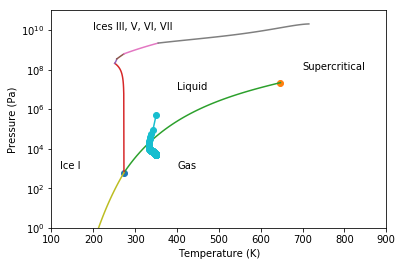

In [6]:
curry_run('Poly_rand_0_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rhoh_0_1,5/final_variables


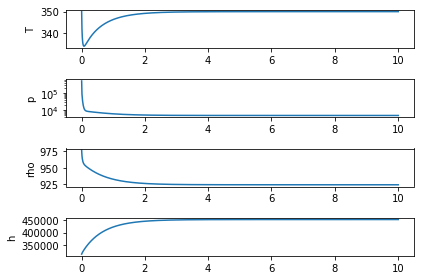

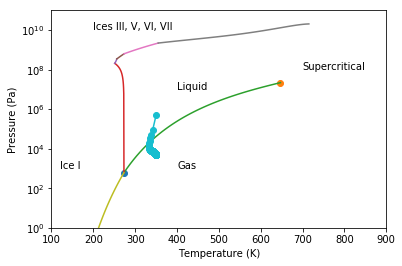

In [6]:
curry_run('Poly_rhoh_0_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_1_1,5/final_variables


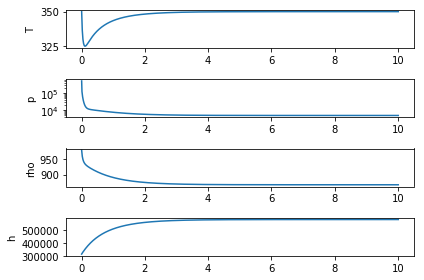

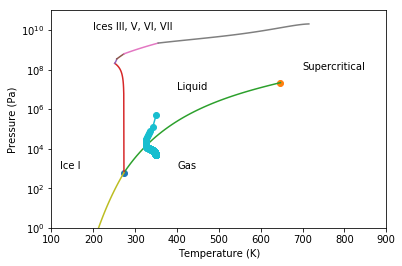

In [7]:
curry_run('Poly_pT_1_1,5')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0_1,3,6,12,sigmoid/final_variables
Failed to converge at t= 3.089999999999978  |Dq| was  1709.4250278860754  after  499  iterations; quiting.


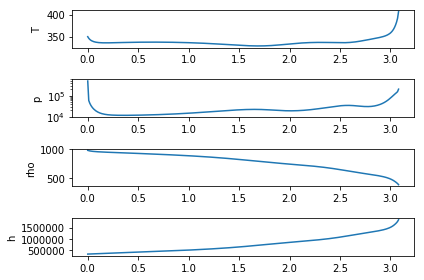

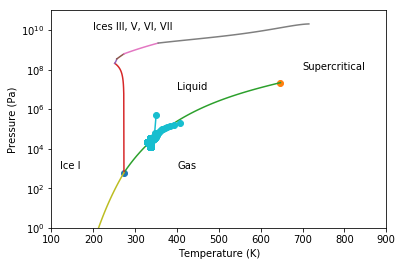

In [8]:
curry_run('Classifying_rhoh_0_1,3,6,12,sigmoid')

# Drain

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_iapws_lg_logp/Classifying_pT_0.0_1,3,3,3,sigmoid/final_variables


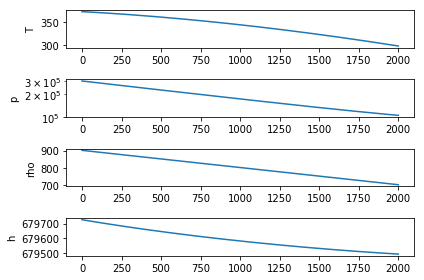

(array([[ 0.00000000e+00, -3.17572550e-01,  1.21532116e-01, ...,
          3.00000000e+05,  9.01389762e+02,  6.79727250e+05],
        [ 2.00000000e+00, -3.17389814e-01,  1.21068110e-01, ...,
          2.99668237e+05,  9.01189829e+02,  6.79726882e+05],
        [ 4.00000000e+00, -3.17207252e-01,  1.20604383e-01, ...,
          2.99336897e+05,  9.00989895e+02,  6.79726514e+05],
        ...,
        [ 1.99600000e+03, -1.99187505e-01, -2.64734789e-01, ...,
          1.06651379e+05,  7.01874810e+02,  6.79490799e+05],
        [ 1.99800000e+03, -1.99121311e-01, -2.65073129e-01, ...,
          1.06560163e+05,  7.01674911e+02,  6.79490669e+05],
        [ 2.00000000e+03, -1.99055206e-01, -2.65411394e-01, ...,
          1.06469116e+05,  7.01475013e+02,  6.79490540e+05]]),
 <latent_sim.LatentSim at 0x13fb12f98>)

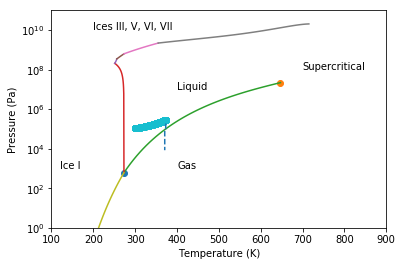

In [9]:
curry_run('Classifying_pT_0.0_1,3,3,3,sigmoid',
          eos='water_iapws_lg_logp',
          prob='Liquid_Drain',ref_file="reference_solutions/Liquid_Drain.csv")

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_iapws_lg_logp/Classifying_rhoh_0.0_1,3,6,12,sigmoid/final_variables


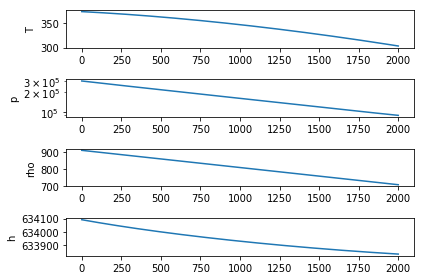

(array([[ 0.00000000e+00,  4.84472853e-01,  6.69569871e-02, ...,
          3.00000000e+05,  9.08561646e+02,  6.34091853e+05],
        [ 2.00000000e+00,  4.83882166e-01,  6.67058137e-02, ...,
          2.99614067e+05,  9.08361699e+02,  6.34091428e+05],
        [ 4.00000000e+00,  4.83292100e-01,  6.64548818e-02, ...,
          2.99228779e+05,  9.08161753e+02,  6.34091004e+05],
        ...,
        [ 1.99600000e+03,  5.17484107e-02, -1.42154348e-01, ...,
          8.85968802e+04,  7.09033421e+02,  6.33835871e+05],
        [ 1.99800000e+03,  5.14067092e-02, -1.42355272e-01, ...,
          8.84960097e+04,  7.08833503e+02,  6.33835728e+05],
        [ 2.00000000e+03,  5.10651361e-02, -1.42556203e-01, ...,
          8.83953060e+04,  7.08633586e+02,  6.33835586e+05]]),
 <latent_sim.LatentSim at 0x14ee189b0>)

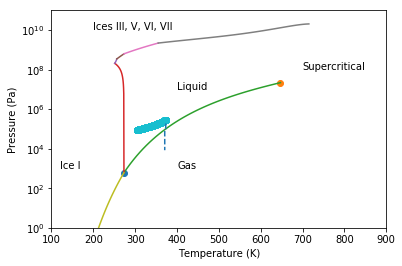

In [10]:
curry_run('Classifying_rhoh_0.0_1,3,6,12,sigmoid',
          eos='water_iapws_lg_logp',
          prob='Liquid_Drain',ref_file="reference_solutions/Liquid_Drain.csv")



In [6]:
curry_run('Classifying_rhoh_0.0_1,3,3,4,sigmoid',
          prob='Liquid_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0.0_1,3,3,4,sigmoid/final_variables


KeyError: "The name 'encode:0' refers to a Tensor which does not exist. The operation, 'encode', does not exist in the graph."

# Transition with Constant production

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_pT_1_1,5/final_variables
Failed to converge at t= 0.6000000000000003  |Dq| was  0.011698083724414577  after  499  iterations; quiting.


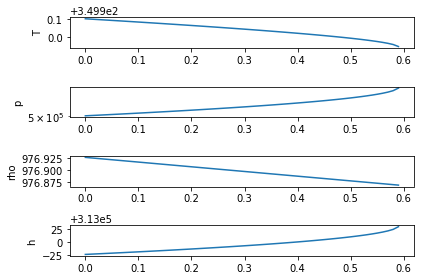

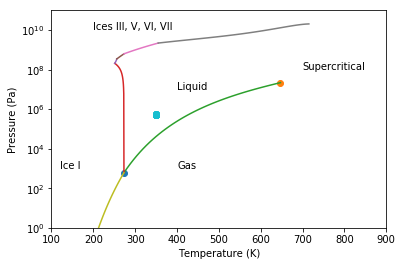

In [7]:
curry_run('Poly_pT_1_1,5',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Poly_rand_0_1,5/final_variables
Failed to converge at t= 0.48000000000000026  |Dq| was  0.0023135794197128995  after  499  iterations; quiting.


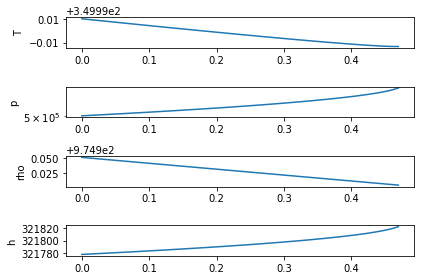

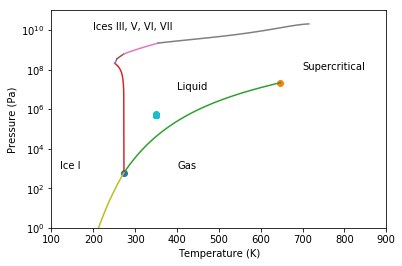

In [8]:
curry_run('Poly_rand_0_1,5',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rhoh_0_1,3,6,12,sigmoid/final_variables
Failed to converge at t= 2.3299999999999943  |Dq| was  0.006220728412619889  after  499  iterations; quiting.


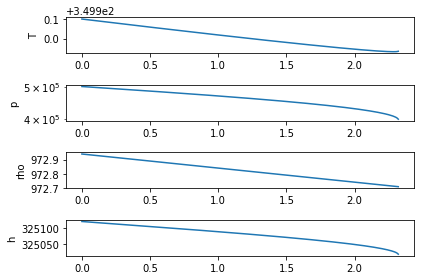

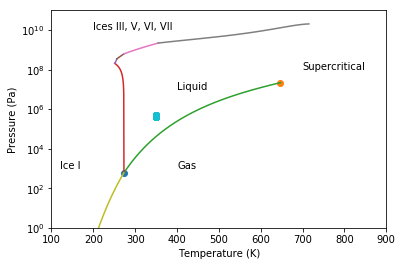

In [9]:
curry_run('Classifying_rhoh_0_1,3,6,12,sigmoid',
          prob='Transition_L2G_Drain')

INFO:tensorflow:Restoring parameters from /Users/afq/Google Drive/networks/training_water_lg/Classifying_rand_0.0_1,4,6,12,sigmoid/final_variables


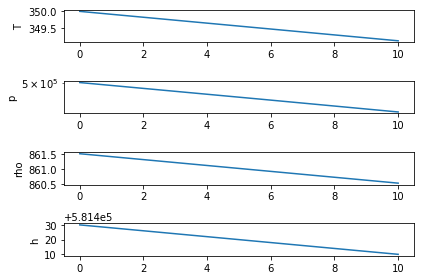

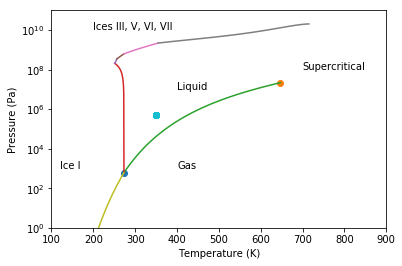

In [12]:
curry_run('Classifying_rand_0.0_1,4,6,12,sigmoid',
          prob='Transition_L2G_Drain')